# Chapter 3 Autencoder



In [24]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras import  layers, models, datasets, callbacks
import tensorflow.keras.backend as K
import seaborn as sns
from utils import display

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

In [3]:
def preprocess(imgs):
    imgs = imgs.astype("float32")/255.0 # convert to 0-1 values
    imgs = np.pad(imgs, ((0, 0), (2, 2),(2, 2)), constant_values=0.0) # pad to 32 by 32
    imgs = np.expand_dims(imgs, -1)
    return imgs

x_train = preprocess(x_train)
x_test = preprocess(x_test)

In [4]:
# Build encoder

encoder_input = layers.Input(shape=(32,32,1), name="encoder_input")

# start creating conv encoder
x = layers.Conv2D(32, (3,3), strides=2, activation="relu", padding="same")(encoder_input)
x = layers.Conv2D(64, (3,3), strides=2, activation="relu", padding="same")(x) # 64 filters
x = layers.Conv2D(128, (3,3), strides=2, activation="relu", padding="same")(x)# 128 filters

shape_before_flattening = K.int_shape(x)[1:]

x = layers.Flatten()(x)
encoder_output = layers.Dense(2, name="encoder_output")(x)

encoder = models.Model(encoder_input, encoder_output)

2023-12-08 23:25:14.985034: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-08 23:25:15.069051: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-08 23:25:15.069270: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-08 23:25:15.069754: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [5]:
# Build decoder


decoder_input = layers.Input(shape=(2, ), name="decoder_input")

# start creating conv encoder
x = layers.Dense(np.prod(shape_before_flattening))(decoder_input) # Connect to dense layer from encoder
x = layers.Reshape(shape_before_flattening)(x) # Reshape the dense input to match the shape of the encoder just before its own dense layer

x = layers.Conv2DTranspose(128, (3,3), strides=2, activation="relu", padding="same")(x)  # Stack the conv2D transpose layers on top of each other 
x = layers.Conv2DTranspose(64, (3,3), strides=2, activation="relu", padding="same")(x) 
x = layers.Conv2DTranspose(32, (3,3), strides=2, activation="relu", padding="same")(x) 

decoder_output = layers.Conv2D(1, (3, 3), strides=1, activation="sigmoid", padding="same", name="decoder_output")(x)
decoder = models.Model(decoder_input, decoder_output)

In [6]:
autoencoder = models.Model(encoder_input, decoder(encoder_output))

In [7]:
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [8]:
autoencoder.fit(x_train,
                x_train, 
                epochs=5, 
                batch_size=100, 
                shuffle=True, 
                validation_data = (x_test, x_test)
               )

2023-12-08 23:25:26.848903: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 245760000 exceeds 10% of free system memory.
2023-12-08 23:25:27.042654: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 245760000 exceeds 10% of free system memory.
2023-12-08 23:25:27.235086: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 245760000 exceeds 10% of free system memory.
2023-12-08 23:25:27.343443: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 245760000 exceeds 10% of free system memory.


Epoch 1/5


2023-12-08 23:25:29.309898: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-12-08 23:25:31.454238: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-08 23:25:31.454654: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-08 23:25:31.454670: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-12-08 23:25:31.455101: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-08 23:25:31.455153: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-12-08 23:25:32.804457: I tensorflow/stream_executor/cuda/c

599/600 [============================>.] - ETA: 0s - loss: 0.2943

2023-12-08 23:25:39.217074: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 40960000 exceeds 10% of free system memory.


600/600 [==============================] - 12s 10ms/step - loss: 0.2943 - val_loss: 0.2605
Epoch 2/5
600/600 [==============================] - 5s 9ms/step - loss: 0.2566 - val_loss: 0.2552
Epoch 3/5
600/600 [==============================] - 6s 9ms/step - loss: 0.2532 - val_loss: 0.2531
Epoch 4/5
600/600 [==============================] - 5s 9ms/step - loss: 0.2514 - val_loss: 0.2521
Epoch 5/5
600/600 [==============================] - 5s 9ms/step - loss: 0.2502 - val_loss: 0.2516


In [27]:
ex_images = x_test[:5000]


In [28]:
preds = autoencoder.predict(ex_images)

157/157 [==============================] - 1s 3ms/step


Example real clothing items


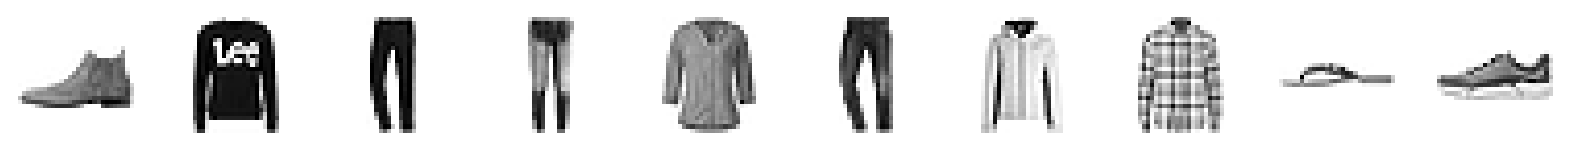

Reconstructions


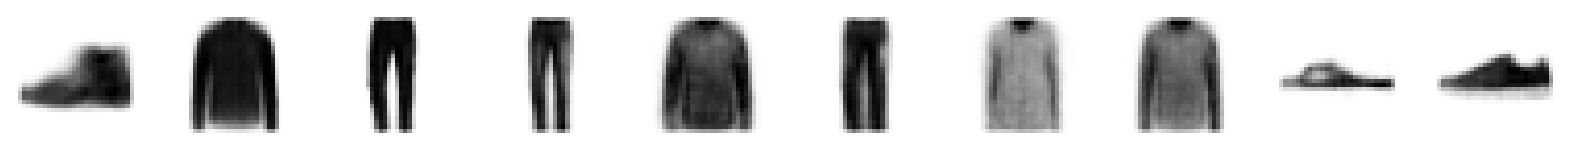

In [29]:
print("Example real clothing items")
display(ex_images)
print("Reconstructions")
display(preds)

# Plotting embeddings

In [30]:
embeddings = encoder.predict(ex_images)

157/157 [==============================] - 0s 2ms/step


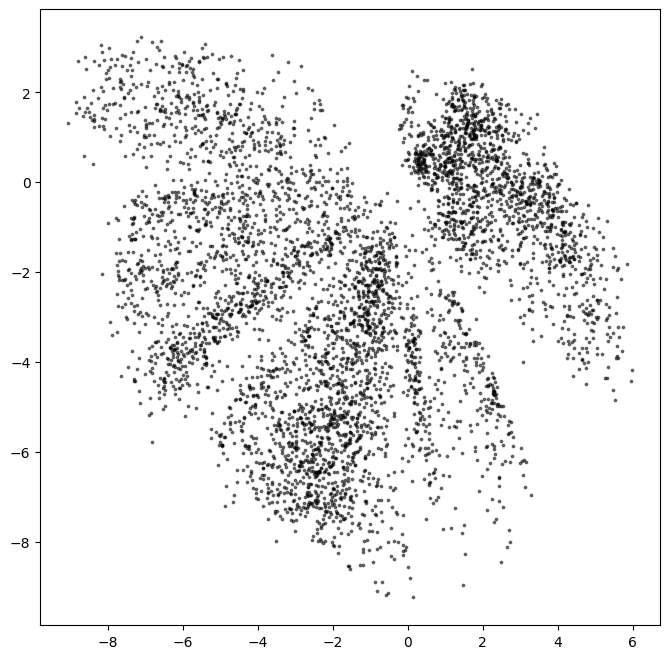

In [31]:
figsize = 8

plt.figure(figsize=(figsize, figsize))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c="black", alpha=0.5, s=3)
plt.show()

In [19]:
embeddings

array([[ 2.0576401e+00, -1.8464629e-01],
       [-2.3791139e+00, -6.9493876e+00],
       [-8.8399153e+00,  1.7744895e+00],
       [-4.9298058e+00,  1.4326332e+00],
       [-8.6599904e-01, -3.7977333e+00],
       [-5.8443918e+00,  4.0029222e-01],
       [-1.1528854e+00, -1.6613312e+00],
       [-1.1478300e+00, -3.0334804e+00],
       [ 8.8326484e-03,  1.6334816e+00],
       [ 1.4300694e+00,  1.6047138e+00]], dtype=float32)